### How to access DOORS cubes based on model data by METU

This notebook serves to explain how to access data cubes that have been created based on model data provided by METU for the Black Sea region. The cubes are accessed using the xcube package. To access the data, the first step is to set up a store that establishes the connection to the s3 bucket hosting the data.

In [1]:
from xcube.core.store import new_data_store

In [2]:
metu_model_store = new_data_store(
    "s3",
    root="doors-cubes/model-data/METU",
    max_depth=1
)

Next, we can list the data cubes that are stored in this bucket. 

In [3]:
list(metu_model_store.get_data_ids())

['BlackSea_1d_20160101_20160331_bgc_nut.levels',
 'BlackSea_1d_20160101_20160331_bgc_phyto.levels']

We can get a description of the data and open the dataset.

In [4]:
metu_model_store.describe_data('BlackSea_1d_20160101_20160331_bgc_nut.levels')

In [5]:
ds_nut = metu_model_store.open_data('BlackSea_1d_20160101_20160331_bgc_nut.levels')
ds_nut

For purposes of better visualisation, the data is provided as a MultiLevelDataset. We may access the underlying dataset like this:

In [6]:
display(ds_nut.base_dataset)

<xarray.Dataset>
Dimensions:               (time: 91, deptht: 61, lat: 235, lon: 544,
                           axis_nbounds: 2)
Coordinates:
  * deptht                (deptht) float32 2.499 7.499 ... 2.146e+03 2.244e+03
  * lat                   (lat) float32 40.6 40.63 40.66 ... 47.05 47.08 47.11
  * lon                   (lon) float32 27.2 27.23 27.26 ... 42.24 42.27 42.3
    nav_lat               (lat, lon) float32 dask.array<chunksize=(118, 544), meta=np.ndarray>
    nav_lon               (lat, lon) float32 dask.array<chunksize=(118, 544), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2016-01-01T12:00:00 ... 2016-...
    time_centered         (time) datetime64[ns] dask.array<chunksize=(91,), meta=np.ndarray>
    time_counter          (time) datetime64[ns] dask.array<chunksize=(91,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    F2_f                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    F3_f                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    M2_m                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    M3_m                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    M4_m                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    N1_p                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    ...                    ...
    S2_u                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    S3_u                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    S4_u                  (time, deptht, lat, lon) float32 dask.array<chunksize=(91, 1, 235, 544), meta=np.ndarray>
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(91, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(91, 2), meta=np.ndarray>
Attributes: (12/28)
    Conventions:             CF-1.5
    TimeStamp:               02/05/2022 13:23:29 +0300
    acknowledgment:          DOORS project
    contributor_name:        METU
    contributor_url:         https://www.metu.edu.tr/
    creator_email:           info@brockmann-consult.de
    ...                      ...
    project:                 DOORS
    recipe:                  https://github.com/bcdev/doors-recipes/cubegen/METU
    timeStamp:               2022-May-01 15:38:50 +03
    time_coverage_end:       2016-03-31T12:00:00
    time_coverage_start:     2016-01-01T12:00:00
    title:                   BGC nutrients

We can then visualise a single image ...

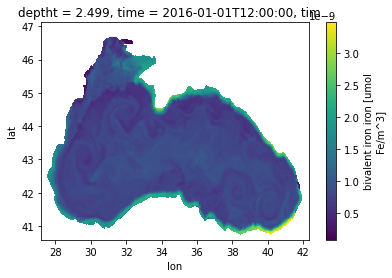

In [7]:
ds_nut.base_dataset.F2_f.isel(deptht=0, time=0).plot()

... or a time series.

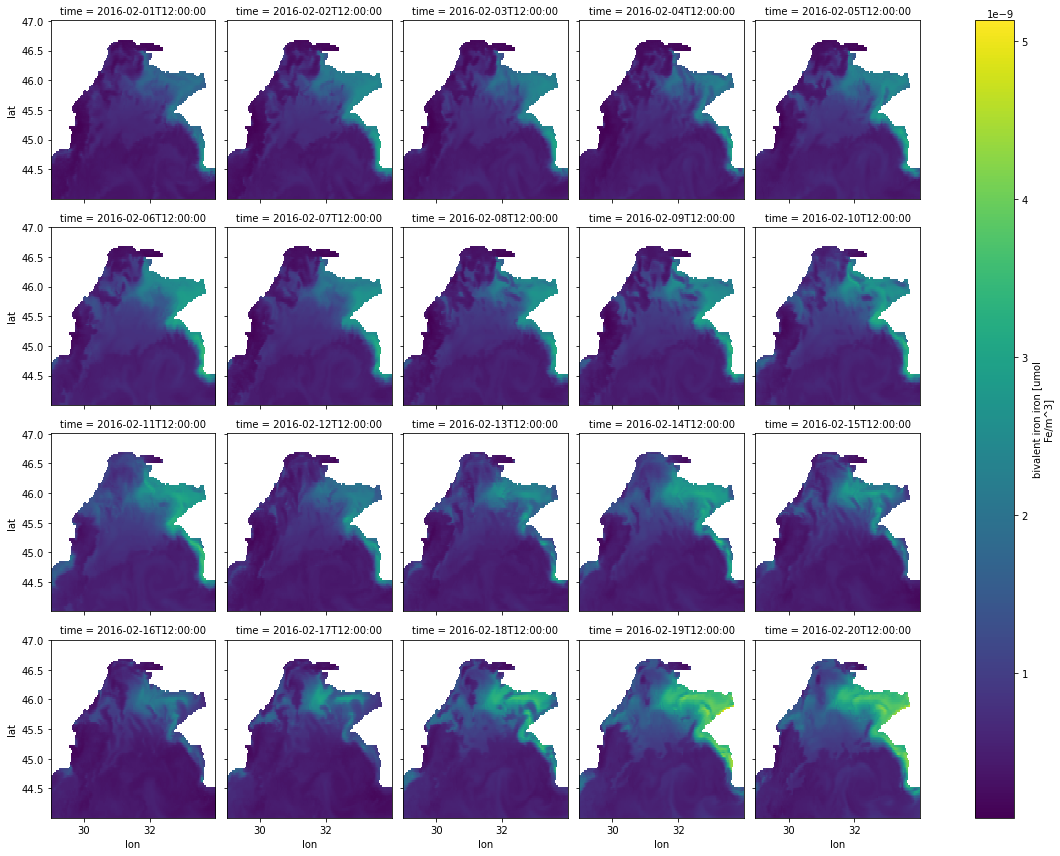

In [8]:
ds_nut.base_dataset.F2_f.isel(deptht=0).sel({'time': slice('2016-02-01', '2016-02-20'), 'lat': slice(44, 47), 'lon': slice(29,34)}).plot.imshow(col='time', col_wrap=5)